# 3. Exploratory Data Analysis (EDA)

In diesem Abschnitt untersuchen wir das Netflix-Dataset, um ein erstes Gefühl für die Daten zu bekommen. 
Wir analysieren Datentypen, Verteilungen und wichtige Eigenschaften wie:
- Verteilung Movie vs TV Show
- Erscheinungsjahre
- Ratings
- Häufigste Genres

Dies hilft uns, später sinnvoll Features zu wählen und gute Cluster zu erstellen.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


- Das Dataset enthält XYZ Zeilen und ABC Spalten.
- Die wichtigsten Spalten sind: type, release_year, duration, rating, listed_in.
- Einige Spalten enthalten fehlende Werte (z. B. director, cast).


### Umgang mit fehlenden Werten

Das Netflix-Dataset enthält einige Spalten mit fehlenden Werten. 
Besonders betroffen sind die Felder *director*, *cast* und *country*, 
da viele internationale Produktionen keine vollständigen Metadaten enthalten.

Für unsere Analyse ist das unproblematisch, da diese Spalten nicht 
für das Clustering verwendet werden. 
Die für uns wichtigen Features wie *type*, *release_year*, *duration*, 
*rating* und *listed_in* sind nahezu vollständig. 

Daher können wir entweder:
- die wenigen fehlenden Ratings droppen oder
- sie als 'Unknown' kategorisieren.

Insgesamt ist die Datenqualität für unser Projekt ausreichend.


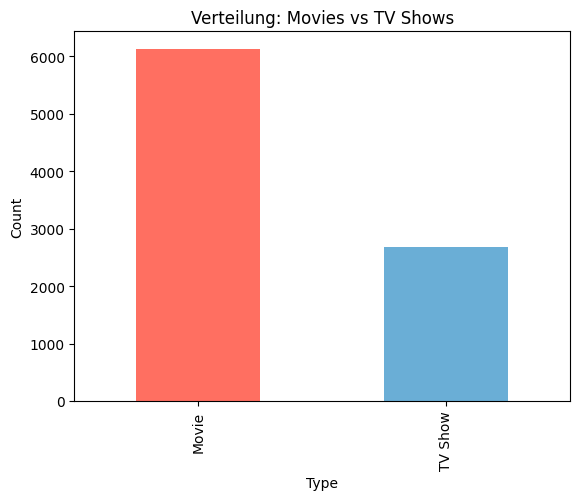

In [3]:
df['type'].value_counts().plot(kind='bar', color=['#ff6f61', '#6aaed6'])
plt.title("Verteilung: Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


Der Datensatz enthält deutlich mehr Movies als TV Shows. 
Das ist typisch für den Netflix-Katalog, da Filme häufiger hinzugefügt werden und eine breitere Genreabdeckung haben. 
Diese ungleiche Verteilung sollten wir später im Clustering beachten.


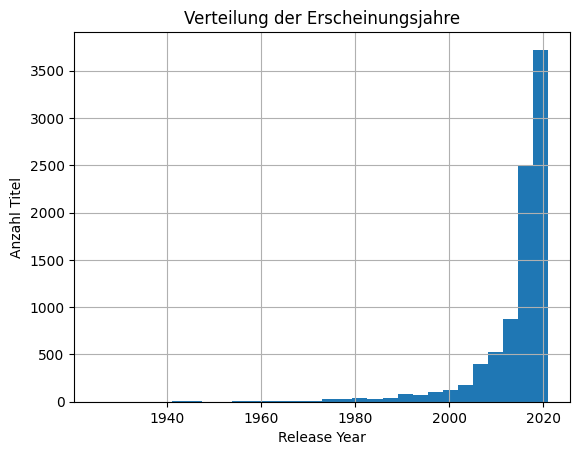

In [4]:
df['release_year'].hist(bins=30)
plt.title("Verteilung der Erscheinungsjahre")
plt.xlabel("Release Year")
plt.ylabel("Anzahl Titel")
plt.show()


Die meisten Titel stammen aus den Jahren 2010–2020. 
Ältere Inhalte (vor 2000) sind sehr selten. 
Netflix fokussiert sich klar auf neuere Produktionen.


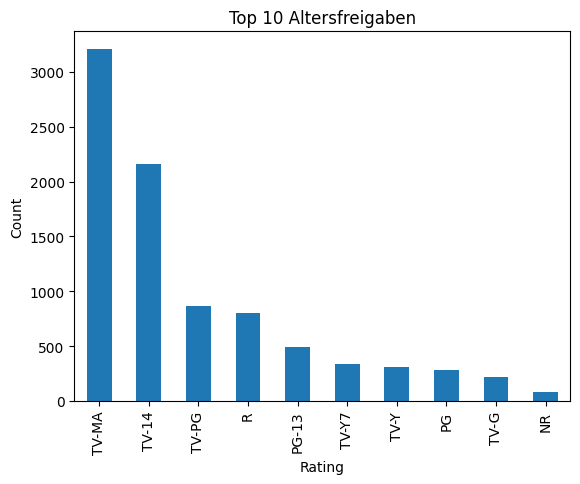

In [5]:
df['rating'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Altersfreigaben")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


Die häufigsten Ratings sind TV-MA und TV-14, also eher Inhalte für Erwachsene und Jugendliche. 
Family Content (z. B. TV-G, PG) ist deutlich weniger vertreten.


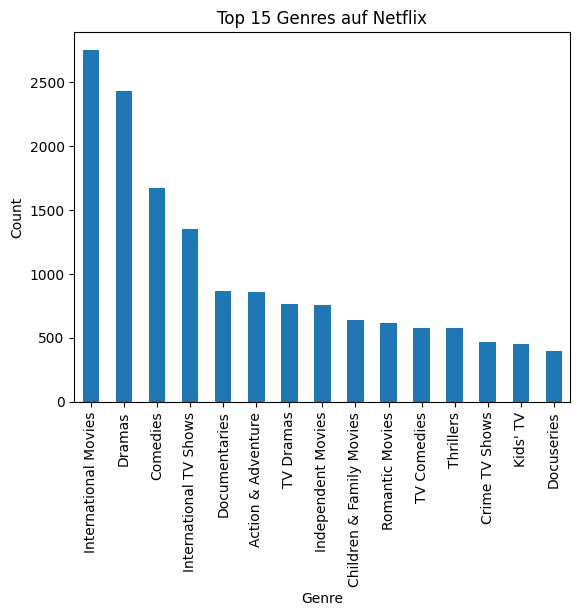

In [6]:
genre_series = df['listed_in'].dropna().str.split(', ')
all_genres = pd.Series([g for sub in genre_series for g in sub])
all_genres.value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Genres auf Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


Die beliebtesten Kategorien im Netflix-Katalog sind International Movies, Dramen, Comedies und Dokumentationen. 
Viele Titel gehören zu mehreren Genres gleichzeitig, was später beim Clustering berücksichtigt werden muss.
